In [15]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

# Request API data from the NYC Open Data website 
base_url = "https://data.cityofnewyork.us/resource/ipu4-2q9a.json"
covid_url = "https://data.cityofnewyork.us/resource/rc75-m7u3.json"

# Check the API documentation to apply preliminary fileters and convert data to JSON:
new_url = base_url + "?$limit=50000" + '&' + "$where=filing_date like '2020%'"
results = requests.get(new_url).json()

covid_results = requests.get(covid_url, ).json()

# Convert results to pandas DataFrame
results_df = pd.DataFrame(results)
covid_df = pd.DataFrame(covid_results)

In [16]:
len(requests.get(new_url).json())

29553

In [3]:
covid_df['date_of_interest'] = pd.to_datetime(covid_df['date_of_interest'])
covid_df['case_count'] = covid_df['case_count'].astype(str).astype(int)
covid_df

,date_of_interest,case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,bx_case_count,bx_hospitalized_count,...,qn_case_count_7day_avg,qn_hospitalized_count_7day_avg,qn_death_count_7day_avg,si_case_count,si_hospitalized_count,si_death_count,si_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,incomplete
0,2020-02-29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020-11-29,1622,133,11,1,1813,126,12,216,28,...,491,35,3,262,21,3,229,18,3,6000
275,2020-11-30,2580,152,17,2,1863,129,12,414,46,...,501,36,3,343,11,2,238,17,3,6000
276,2020-12-01,2665,157,17,4,1961,134,12,479,39,...,532,37,3,304,17,7,248,17,3,6000
277,2020-12-02,2087,125,22,3,1938,137,14,357,27,...,535,38,3,258,19,3,245,17,3,6000


In [4]:
#Permit Issuance API data frame
pd.options.display.max_columns = None
results_df['filing_date'] = pd.to_datetime(results_df['filing_date'])
results_df

,borough,bin__,house__,street_name,job__,job_doc___,job_type,block,lot,community_board,zip_code,bldg_type,residential,permit_status,filing_status,permit_type,permit_sequence__,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee_s_first_name,permittee_s_last_name,permittee_s_business_name,permittee_s_phone__,permittee_s_license_type,permittee_s_license__,owner_s_business_type,non_profit,owner_s_business_name,owner_s_first_name,owner_s_last_name,owner_s_house__,owner_s_house_street_name,city,state,owner_s_zip_code,owner_s_phone__,dobrundate,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name,self_cert,work_type,permit_subtype,superintendent_first___last_name,superintendent_business_name,special_district_1,site_safety_mgr_s_first_name,site_safety_mgr_s_last_name,site_safety_mgr_business_name,permittee_s_other_title,hic_license,oil_gas,act_as_superintendent
0,BROOKLYN,3052405,247,HANCOCK STREET,301885565,01,A1,01834,00068,303,11216,1,YES,ISSUED,RENEWAL,AL,02,NONE,2020-01-16,2020-01-16,2020-11-21,2005-09-01,DAVID,TOPRAKASHVILI,DIAMOND CITY CONSTRUCTION,6463779443,GC,0619949,CORPORATION,N,247 HANCOCK RE HOLDING CORP,DMITRIY,PARDILOV,247,HANCOCK STREET,BROOKLYN,NY,11216,9177234526,2020-01-22,3730759,40.683010,-73.945964,36,267,Bedford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QUEENS,4619567,161-24,119TH ROAD,421924056,01,NB,12248,00018,412,11434,1,YES,ISSUED,RENEWAL,NB,02,USE UNDER 300 CU.YD,2020-01-15,2020-01-15,2020-09-28,2019-11-15,KULBHAN,CHANDARBHAN,ALL TIME CONSTRUCTION INC,7184193655,GC,0600268,INDIVIDUAL,N,NOT APPLICABLE,DAVID,LOJA,161-26,119 ROAD,QUEENS,NY,11434,3472347296,2020-01-16,3730455,40.681303,-73.782934,28,288,Baisley Park,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,QUEENS,4140159,140-26,58TH RD,421908154,01,A1,06404,00012,407,11355,1,YES,ISSUED,INITIAL,FO,01,NOT APPLICABLE,2020-01-16,2020-01-16,2020-12-08,2020-01-16,WENDY,HE,TGC CONSTRUCTION INC,3473684555,GC,0618643,INDIVIDUAL,N,N/A,YANG RONG,LIN,140-26,58TH RD,FLUSHING,NY,11355,7187373988,2020-01-22,3730760,40.744544,-73.825551,20,80301,Queensboro Hill,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STATEN ISLAND,5803175,221,CANAL STREET,520279868,01,NB,00527,00065,501,10304,2,NaN,ISSUED,RENEWAL,EQ,02,USE UNDER 300 CU.YD,2020-01-15,2020-01-15,2021-01-14,2018-10-22,MATTEO,NICOLOSI,NICOLOSI BROS INC,7186054389,GC,0033687,CORPORATION,N,223 CANAL CORP.,MARK,KOPLOWITZ,12,LAWRENCE AVENUE,BROOKLYN,NY,11230,7182887977,2020-01-16,3730510,40.624726,-74.079764,49,21,Stapleton-Rosebank,N,EQ,FN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MANHATTAN,1005718,199,CHRYSTIE STREET,123178499,04,NB,00426,00027,103,10002,2,NaN,ISSUED,RENEWAL,PL,02,NaN,2020-01-15,2020-01-15,2021-01-14,2019-01-29,ANTHONY,GOFFREDO,TRUE NORTH MECHANICAL LLC,7187688811,MP,0000768,PARTNERSHIP,N,SAGAMORE AK PROPERTY COMPANY LLC,SCOTT,KUMMINGS,80,"8 AVENUE, SUITE 708",NEW YORK,NY,10018,2124526077,2020-01-16,3730511,40.722048,-73.991840,1,3601,Chinatown,N,PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29548,BROOKLYN,3144059,6301,4TH AVE,321760910,01,DM,05809,00007,307,11220,2,NaN,ISSUED,INITIAL,EQ,01,OFF-SITE,2020-06-04,2020-06-05,2021-06-05,2020-06-05,TOBY,"ROMANO, JR",BREEZE NATIONAL INC,7182548070,GC,0002689,CORPORATION,Y,METROPOLITAN NEW YORK SYNOD,DONALD,MCCOID,475,RIVERSIDE DRIVE,NY,NY,10115,2126650732,2020-06-06,3761467,40.639050,-74.020275,38,122,Sunset Park West,N,EQ,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29549,STATEN ISLAND,5106818,121,VAN DUZER STREET,520367077,01,DM,00500,00022,501,10301,2,NaN,ISSUED,INITIAL,DM,01,OFF-SITE,2020-06-04,2020-06-05,2021-01-26,2020-06-05,JOHN,BIANCO,"GRANITE ENVIRONMENT, LLC",7189715572,GC,0618302,NYC AGENCY,N,HOUSING PRESERVATION & DEVELOPME,NYC

In [5]:
import seaborn as sns

In [6]:
#PCOVID daily cases API data frame
covid_cases = pd.pivot_table(covid_df, index = 'date_of_interest', values = 'case_count', aggfunc = 'sum')
covid_cases

,case_count
date_of_interest,
2020-02-29,1
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,5
...,...
2020-11-29,1622
2020-11-30,2580
2020-12-01,2665


In [7]:
covid_summary_df = pd.concat([covid_cases, total_by_day], axis=1)
covid_summary = covid_summary_df.fillna(value = 0.0)
covid_summary

NameError: name 'total_by_day' is not defined

In [8]:
total_by_day = pd.pivot_table(results_df, index = 'filing_date', values = 'borough', aggfunc='count')
total_by_day

,borough
filing_date,
2020-01-01,10
2020-01-02,330
2020-01-03,325
2020-01-05,15
2020-01-06,353
...,...
2020-06-01,216
2020-06-02,298
2020-06-03,245


In [9]:
jobtype_breakdown = pd.pivot_table(results_df, index = 'filing_date', columns = 'job_type', 
                                   values = 'bin__', aggfunc = 'count')
jobtype_breakdown.fillna(value = 0.0)

job_type,A1,A2,A3,DM,NB,SG
filing_date,,,,,,
2020-01-01,1.0,3.0,0.0,0.0,6.0,0.0
2020-01-02,31.0,238.0,8.0,5.0,48.0,0.0
2020-01-03,47.0,195.0,12.0,7.0,64.0,0.0
2020-01-05,0.0,14.0,0.0,0.0,1.0,0.0
2020-01-06,43.0,222.0,15.0,3.0,70.0,0.0
...,...,...,...,...,...,...
2020-06-01,32.0,139.0,6.0,0.0,39.0,0.0
2020-06-02,22.0,232.0,20.0,0.0,24.0,0.0
2020-06-03,41.0,146.0,22.0,1.0,35.0,0.0


In [10]:
borough_breakdown = pd.pivot_table(results_df, index = 'filing_date', columns = 'borough', 
                                   values = 'bin__', aggfunc = 'count')
borough_breakdown.fillna(value = 0.0)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
filing_date,,,,,
2020-01-01,4.0,2.0,2.0,2.0,0.0
2020-01-02,29.0,163.0,75.0,42.0,21.0
2020-01-03,26.0,100.0,113.0,63.0,23.0
2020-01-05,3.0,3.0,3.0,5.0,1.0
2020-01-06,23.0,83.0,135.0,90.0,22.0
...,...,...,...,...,...
2020-06-01,40.0,63.0,72.0,40.0,1.0
2020-06-02,33.0,83.0,112.0,53.0,17.0
2020-06-03,20.0,63.0,110.0,29.0,23.0


In [11]:
resi_count_df = pd.pivot_table(results_df, index = 'filing_date', columns = results_df['residential'].fillna(value = 'NO'), values = 'bin__', aggfunc = 'count')
resi_count = resi_count_df.fillna(value = 0.0)
resi_count

residential,NO,YES
filing_date,,
2020-01-01,2.0,8.0
2020-01-02,153.0,177.0
2020-01-03,175.0,150.0
2020-01-05,0.0,15.0
2020-01-06,141.0,212.0
...,...,...
2020-06-01,103.0,113.0
2020-06-02,208.0,90.0
2020-06-03,103.0,142.0


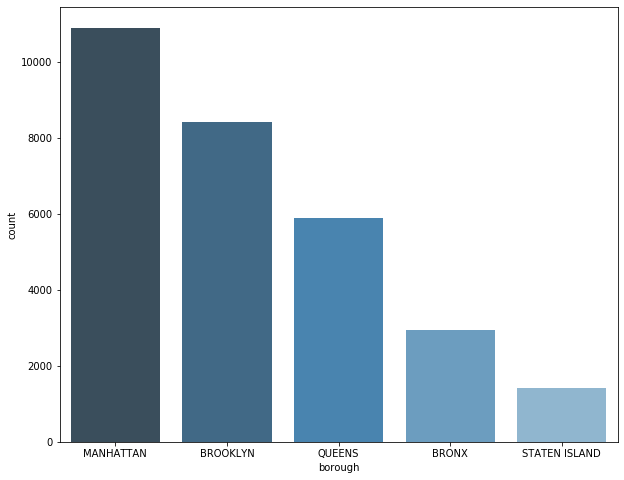

In [12]:
#Total number of permits issued in 2020 in each borough
plt.figure(figsize=(10, 8))
sns.countplot(x='borough', data = results_df, order = results_df['borough'].value_counts().index, palette ="Blues_d")

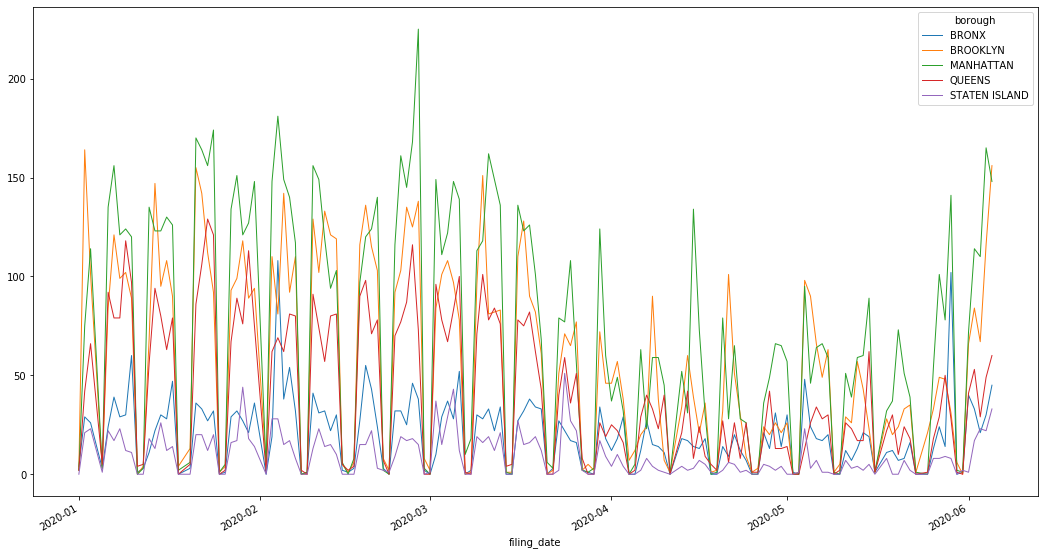

In [31]:
all_chart2 = borough_breakdown.fillna(value = 0.0).plot(kind='line', figsize = (18,10), lw = 1)

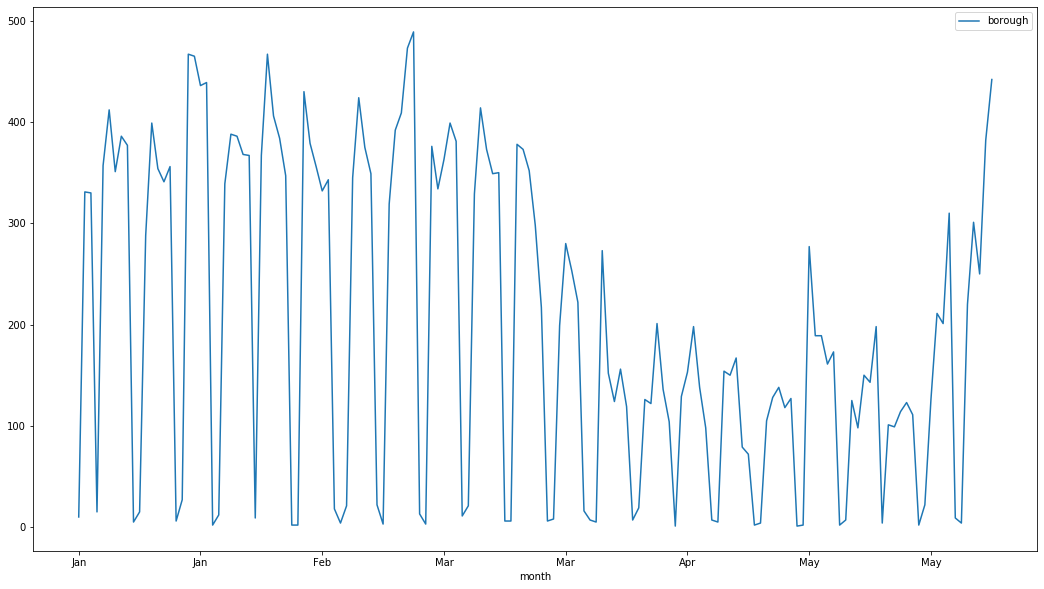

In [139]:
total_by_day.reset_index().plot(kind='line', x='month', y='borough', figsize = (18,10))

Text(0.5, 1.0, 'Residential')

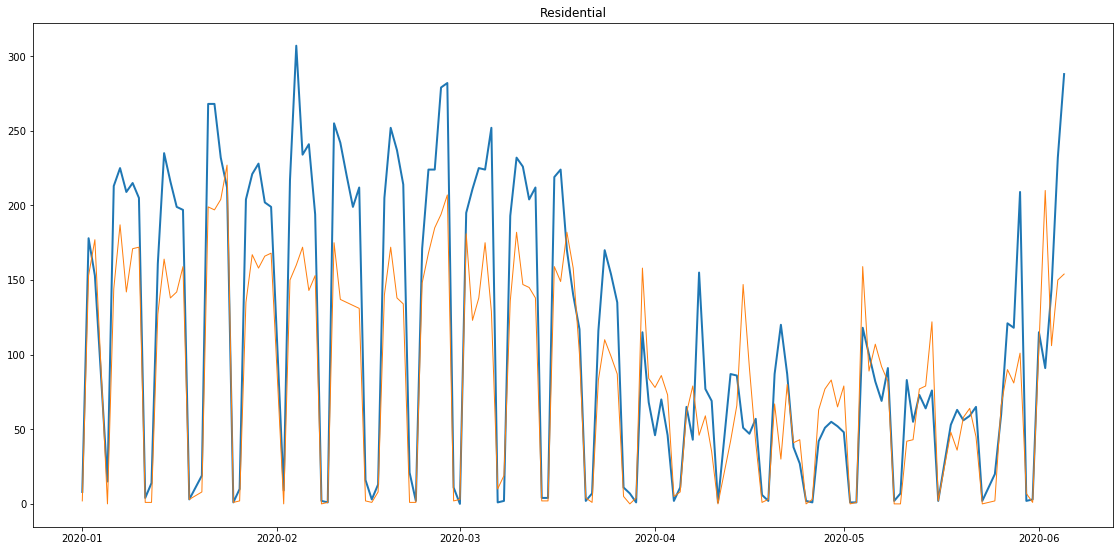

In [32]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0, 0, 1, 1])


ax.plot(resi_count['YES'], linewidth=2)
ax.plot(resi_count['NO'], linewidth=1)


plt.title('Residential')

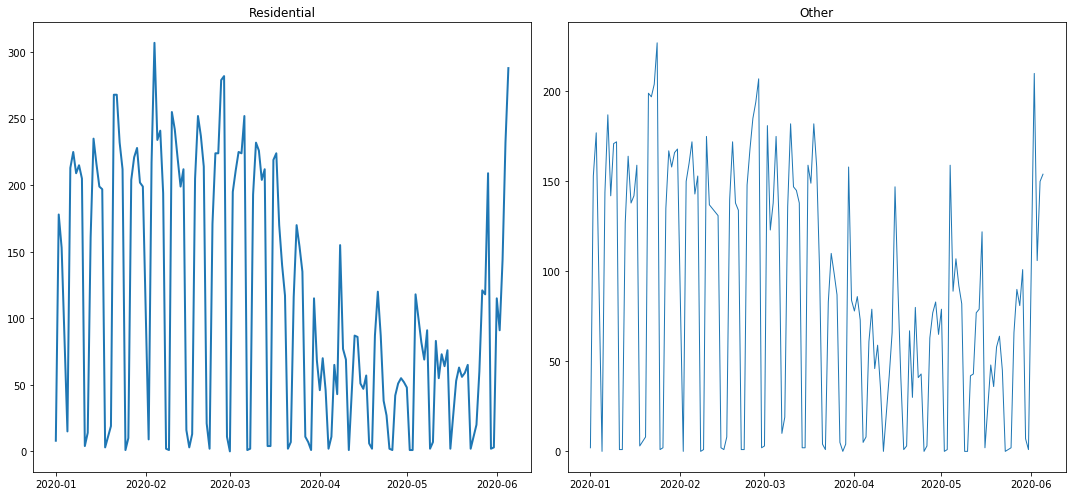

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,7))

axes[0].plot(resi_count['YES'], linewidth=2)
axes[1].plot(resi_count['NO'], linewidth=1)
axes[0].set_title('Residential')
axes[1].set_title('Other')

plt.tight_layout()
plt.show()

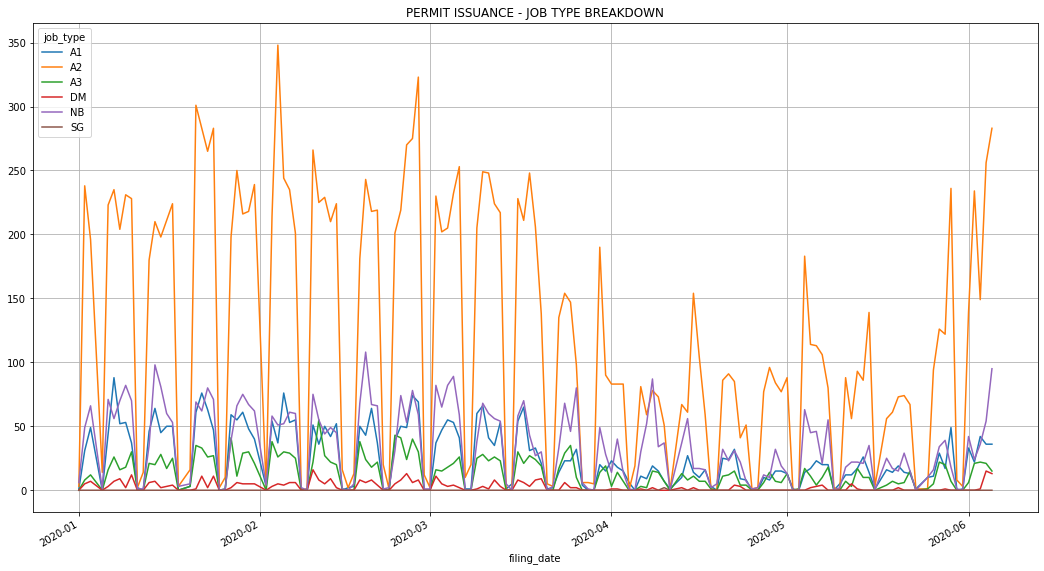

In [36]:
jobtype_breakdown.fillna(value = 0.0).plot(kind='line', figsize = (18,10), lw= 1.5)
plt.title('PERMIT ISSUANCE - JOB TYPE BREAKDOWN')
plt.grid(True)
plt.rc('grid', linestyle="--", color='grey', alpha=0.8)


NameError: name 'covid_summary' is not defined

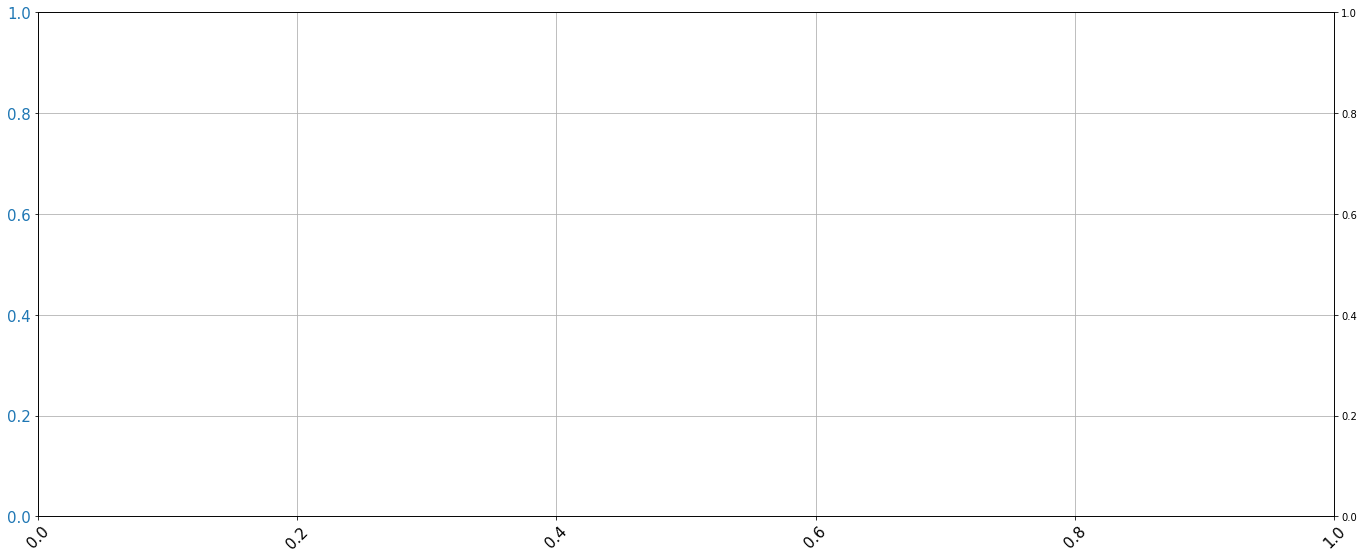

In [13]:
fig = plt.figure(figsize=(18, 7))

line_weight = 1.5
alpha = 0.8

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()

plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15, color='C0', alpha=1)

plt.grid(True)
plt.rc('grid', linestyle="--", color='grey', alpha=0.6)

# This joins the x-axis
ax2 = ax1.twinx()


lns1 = ax1.plot(covid_summary['borough'], color='C0', lw=line_weight, alpha=alpha, label='permit filings')
lns2 = ax2.plot(covid_summary['case_count'], color='C1', lw=line_weight, alpha=alpha, label='case count')
plt.yticks(fontsize=15, color='C1', alpha=1)

# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0, fontsize=15)

#Plot title and tile font size
plt.title('PERMIT ISSUANCE VS. NEW COVID CASES', fontsize=15)


        
plt.show()


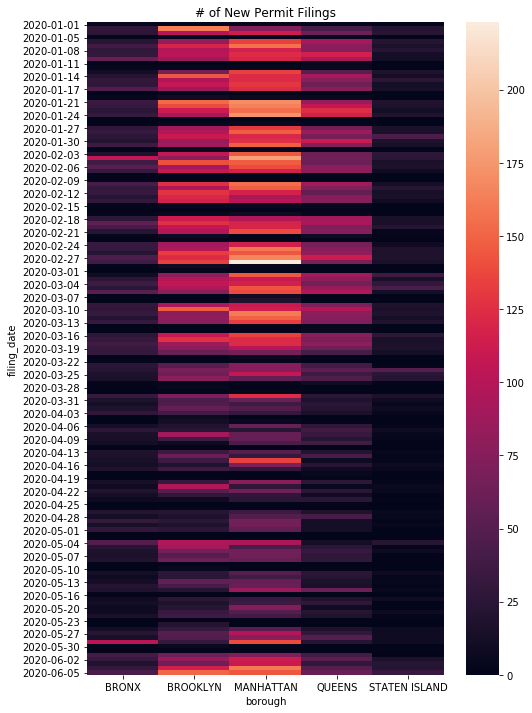

In [14]:
plt.figure(figsize=(8, 12))
plt.title('# of New Permit Filings')

ax = sns.heatmap(borough_breakdown.fillna(value = 0.0))
ax.set_yticklabels([t.get_text().split("T")[0] for t in ax.get_yticklabels()])

ax